In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 6

In [2]:
df = pd.read_csv('6_combined_loan_to_value_ratio.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88058 entries, 0 to 88057
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_tract                              88024 non-null  float64
 1   action_taken                              88058 non-null  int64  
 2   loan_type                                 88058 non-null  int64  
 3   lien_status                               88058 non-null  int64  
 4   reverse_mortgage                          88058 non-null  int64  
 5   open_end_line_of_credit                   88058 non-null  int64  
 6   loan_amount                               88058 non-null  int64  
 7   combined_loan_to_value_ratio              66925 non-null  float64
 8   interest_rate                             88058 non-null  object 
 9   total_loan_costs                          56823 non-null  object 
 10  origination_charges               


 'total_loan_costs',
 'origination_charges',
 'loan_term',
 'property_value',


In [4]:
print(df['total_loan_costs'].value_counts())

total_loan_costs
0.0        1827
695.0      1214
635.43      830
15.43       513
505.43      408
           ... 
9840.1        1
3695.4        1
8003.75       1
6157.89       1
393.73        1
Name: count, Length: 36877, dtype: int64


In [5]:
unique_categories = df['total_loan_costs'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 36877


In [6]:
# First, convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['total_loan_costs'].min()
maximum_interest_rate = df['total_loan_costs'].max()
median_interest_rate = df['total_loan_costs'].median()

print("Minimum total_loan_costs:", minimum_interest_rate)
print("Maximum total_loan_costs:", maximum_interest_rate)
print("Median total_loan_costs:", median_interest_rate)

Minimum total_loan_costs: 0.0
Maximum total_loan_costs: 389990.0
Median total_loan_costs: 3078.43


In [7]:
# Convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['total_loan_costs'].quantile(0.25)
Q3 = df['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_loan_costs'] < lower_bound) | (df['total_loan_costs'] > upper_bound)]

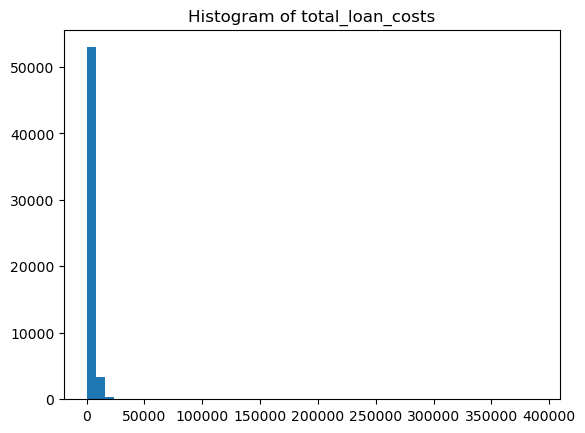

In [8]:
plt.hist(df['total_loan_costs'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of total_loan_costs')
plt.show()

[    nan 8352.71 6854.68 ... 1632.05  562.13  393.73]
31344


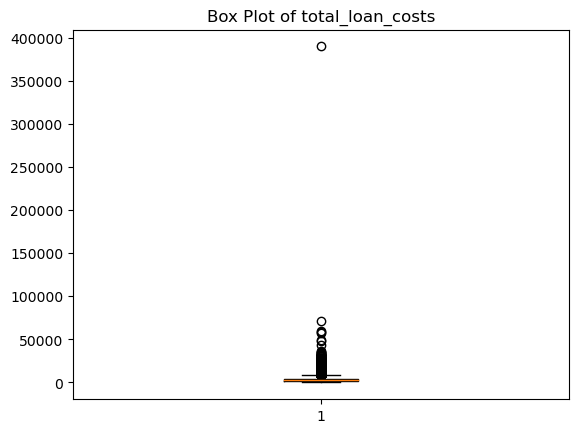

In [9]:
df1 = df.copy()
df1['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')
df1 = df1.dropna(subset=['total_loan_costs'])

print(df['total_loan_costs'].unique())
print(df['total_loan_costs'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['total_loan_costs'])
plt.title('Box Plot of total_loan_costs')
plt.show()